In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

/Users/rumethsandinu/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('/Users/rumethsandinu/Study/Assessments/Year 2/DSGP/Datasets/pre_processed_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699942 entries, 0 to 699941
Columns: 198 entries, Quantity Sold (kilo) to Sale or Return_sale
dtypes: bool(196), float64(2)
memory usage: 141.5 MB


In [3]:
y = df['Quantity Sold (kilo)']
x = df.drop(columns=['Quantity Sold (kilo)'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=42)

x_train_tensor = tf.constant(x_train, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.float32)
x_test_tensor = tf.constant(x_test, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.float32)

x_train_tensor.shape, x_test_tensor.shape

2023-12-03 22:30:02.801113: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2023-12-03 22:30:02.801318: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-12-03 22:30:02.801328: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-12-03 22:30:02.801867: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 22:30:02.802471: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(TensorShape([664944, 197]), TensorShape([34998, 197]))

In [4]:
model = tf.keras.Sequential()

# Dense layers
model.add(tf.keras.layers.Dense(197, activation='relu', input_shape=(x_train_tensor.shape[1],)))

# LSTM layers
# Reshape for LSTM layer
model.add(tf.keras.layers.Reshape((1, 197))) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.LSTM(32))

# Output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='mae', metrics=['mae'])

epoch_number = 5

history = model.fit(x_train_tensor, y_train_tensor, epochs=epoch_number, validation_data=(x_test_tensor, y_test_tensor))

Epoch 1/5


2023-12-03 22:30:10.313648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2023-12-03 22:30:10.399920: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


20780/20780 [==============================] - 312s 15ms/step - loss: 0.1304 - mae: 0.1304 - val_loss: 0.1251 - val_mae: 0.1251
Epoch 2/5
20780/20780 [==============================] - 307s 15ms/step - loss: 0.1245 - mae: 0.1245 - val_loss: 0.1233 - val_mae: 0.1233
Epoch 3/5
20780/20780 [==============================] - 283s 14ms/step - loss: 0.1234 - mae: 0.1234 - val_loss: 0.1241 - val_mae: 0.1241
Epoch 4/5
20780/20780 [==============================] - 305s 15ms/step - loss: 0.1231 - mae: 0.1231 - val_loss: 0.1223 - val_mae: 0.1223
Epoch 5/5
20780/20780 [==============================] - 320s 15ms/step - loss: 0.1229 - mae: 0.1229 - val_loss: 0.1224 - val_mae: 0.1224


In [5]:
y_predictions = model.predict(x_test_tensor)
y_predictions[:5]

1094/1094 [==============================] - 7s 6ms/step


array([[0.10557097],
       [0.37036562],
       [0.41812134],
       [0.54719085],
       [0.5839406 ]], dtype=float32)

In [6]:
y_test_tensor[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0.095, 0.621, 0.447, 1.163, 0.543], dtype=float32)>

Text(0, 0.5, 'loss')

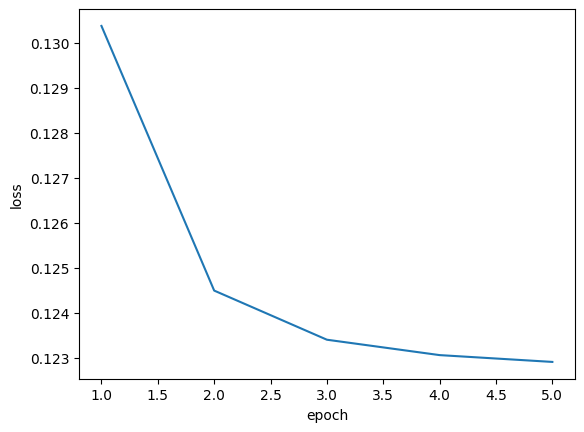

In [8]:
x_range = range(1, epoch_number + 1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')

In [9]:
model.save('sold_amount_model')

INFO:tensorflow:Assets written to: sold_amount_model/assets


INFO:tensorflow:Assets written to: sold_amount_model/assets
